<a href="https://colab.research.google.com/github/lagom-QB/M11/blob/master/Practice_13_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluating GAN
# keywords: inception score

Let's download DCGAN for CIFAR10 with pretrained weihgts.

In [1]:
!git clone https://github.com/csinva/gan-vae-pretrained-pytorch.git

Cloning into 'gan-vae-pretrained-pytorch'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 176 (delta 6), reused 20 (delta 4), pack-reused 153
Receiving objects: 100% (176/176), 88.11 MiB | 11.28 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [0]:
import sys  
sys.path.insert(0, '/content/gan-vae-pretrained-pytorch/cifar10_dcgan')

In [0]:
import dcgan
import os
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import save_image
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pylab
import numpy as np
%load_ext autoreload
%autoreload 2

In [0]:
num_gpu = 1 

from dcgan import Generator

dcgan_generator = Generator(ngpu=1).eval()
   
dcgan_generator.load_state_dict(torch.load('/content/gan-vae-pretrained-pytorch/cifar10_dcgan/weights/netG_epoch_199.pth'))
dcgan_generator = dcgan_generator.cuda()

Here are samples of images generated by DCGAN:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

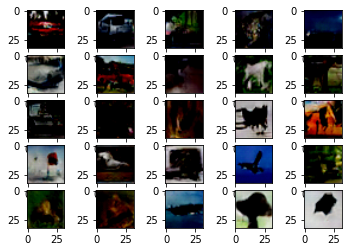

In [5]:

batch_size = 25
latent_size = 100

fixed_noise = torch.randn(batch_size, latent_size, 1, 1)
if torch.cuda.is_available():
    fixed_noise = fixed_noise.cuda()
fake_images = dcgan_generator(fixed_noise)

fake_images_np = fake_images.cpu().detach().numpy()
fake_images_np = fake_images_np.reshape(fake_images_np.shape[0], 3, 32, 32)
fake_images_np = fake_images_np.transpose((0, 2, 3, 1))
R, C = 5, 5
for i in range(batch_size):
    plt.subplot(R, C, i + 1)
    plt.imshow(fake_images_np[i], interpolation='bilinear')
plt.show()

Let's download another GAN (SNGAN).

In [6]:
!git clone https://github.com/GongXinyuu/sngan.pytorch.git

Cloning into 'sngan.pytorch'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 118 (delta 72), reused 90 (delta 48), pack-reused 0
Receiving objects: 100% (118/118), 32.08 KiB | 16.04 MiB/s, done.
Resolving deltas: 100% (72/72), done.


Download cifar statistics:

In [7]:
! curl http://bioinf.jku.at/research/ttur/ttur_stats/fid_stats_cifar10_train.npz -o sngan.pytorch/fid_stat/fid_stats_cifar10_train.npz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: Failed to create the file 
  0 30.6M    0 13414    0     0  12513      0  0:42:49  0:00:01  0:42:48 12513
curl: (23) Failed writing body (0 != 13414)


Download weights from google drive:

In [0]:
! mkdir sngan.pytorch/pre_trained

In [0]:
!pip install -U -q PyDrive


In [0]:
from google.colab import auth
auth.authenticate_user()


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fileId = '1koEJbx9anP2-BEMrqX6jgWXAvEUXG0AU'
fileName = fileId
downloaded = drive.CreateFile({'id': fileId})
downloaded.GetContentFile(fileName)

In [0]:
!mv /content/1koEJbx9anP2-BEMrqX6jgWXAvEUXG0AU sngan.pytorch/pre_trained/sngan_cifar10.pth

In [0]:
import sys  
sys.path.insert(0, '/content/sngan.pytorch')

In [0]:
import models

In [0]:
class args:
  img_size = 32
  latent_dim = 128
  gf_dim = 256
  bottom_width = 4
  g_spectral_norm = False

In [0]:
sngan_generator = models.sngan_cifar10.Generator(args=args).cuda()


In [0]:
checkpoint_file = "/content/sngan.pytorch/pre_trained/sngan_cifar10.pth"


In [0]:
checkpoint = torch.load(checkpoint_file)

In [19]:
sngan_generator.load_state_dict(checkpoint)

<All keys matched successfully>

Let's draw some examples:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

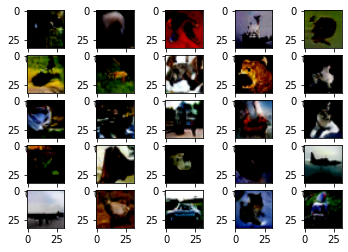

In [20]:
batch_size = 25
latent_size = 128

fixed_noise = torch.randn(batch_size, latent_size)
if torch.cuda.is_available():
    fixed_noise = fixed_noise.cuda()
fake_images = sngan_generator(fixed_noise)

fake_images_np = fake_images.cpu().detach().numpy()
fake_images_np = fake_images_np.reshape(fake_images_np.shape[0], 3, 32, 32)
fake_images_np = fake_images_np.transpose((0, 2, 3, 1))
R, C = 5, 5
for i in range(batch_size):
    plt.subplot(R, C, i + 1)
    plt.imshow(fake_images_np[i], interpolation='bilinear')
plt.show()

How can we compare this generators?
Inception score (see, ex. https://medium.com/octavian-ai/a-simple-explanation-of-the-inception-score-372dff6a8c7a)



In [0]:
import torch
from torch import nn
from torch.autograd import Variable
from torch.nn import functional as F
import torch.utils.data

from torchvision.models.inception import inception_v3

import numpy as np
from scipy.stats import entropy

In [22]:
dtype = torch.cuda.FloatTensor
inception_model = inception_v3(pretrained=True, transform_input=False).type(dtype)
inception_model.eval()

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/checkpoints/inception_v3_google-1a9a5a14.pth


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [0]:
def inception_score(imgs, batch_size=32, resize=False, splits=1):
    """Computes the inception score of the generated images imgs
    imgs -- Torch dataset of (3xHxW) numpy images normalized in the range [-1, 1]
    cuda -- whether or not to run on GPU
    batch_size -- batch size for feeding into Inception v3
    splits -- number of splits
    """
    N = len(imgs)
    print(f"number of images is {N}")
    assert batch_size > 0
    assert N > batch_size


    # Set up dataloader
    dataloader = torch.utils.data.DataLoader(imgs, batch_size=batch_size)


    up = nn.Upsample(size=(299, 299), mode='bilinear').type(dtype)
    def get_pred(x):
        if resize:
            x = up(x)
        x = inception_model(x)
        return F.softmax(x).data.cpu().numpy()

    # Get predictions
    print ("allocating memory for predictions")
    preds = np.zeros((N, 1000))
    print("running predictions")
    for i, batch in enumerate(dataloader, 0):
        batch = batch.type(dtype)
        batchv = Variable(batch)
        batch_size_i = batch.size()[0]

        preds[i*batch_size:i*batch_size + batch_size_i] = get_pred(batchv)

    # Now compute the mean kl-div
    split_scores = []

    for k in range(splits):
        print(f"split {k}")
        part = preds[k * (N // splits): (k+1) * (N // splits), :]
        py = np.mean(part, axis=0)
        scores = []
        for i in range(part.shape[0]):
            pyx = part[i, :]
            scores.append(entropy(pyx, py))
        split_scores.append(np.exp(np.mean(scores)))

    return np.mean(split_scores), np.std(split_scores)


In [0]:
torch.cuda.empty_cache()

In [25]:
class IgnoreLabelDataset(torch.utils.data.Dataset):
  def __init__(self, orig):
    self.orig = orig

  def __getitem__(self, index):
    return self.orig[index][0]

  def __len__(self):
    return len(self.orig)

import torchvision.datasets as dset
import torchvision.transforms as transforms

cifar = dset.CIFAR10(root='data/', download=True,
                    transform=transforms.Compose([
                        transforms.Scale(32),
                        transforms.ToTensor(),
                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                    ])
)

no_labels_cifar = IgnoreLabelDataset(cifar)
print("taking_subset")
cifar_subset, _ = torch.utils.data.random_split(no_labels_cifar, [5000, len(no_labels_cifar) - 5000])
print ("calculating inception_score")
print (inception_score(cifar_subset, batch_size=64, resize=True, splits=10))

/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:211: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


Extracting data/cifar-10-python.tar.gz to data/
taking_subset
calculating inception_score
number of images is 5000
allocating memory for predictions
running predictions


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


split 0
split 1
split 2
split 3
split 4
split 5
split 6
split 7
split 8
split 9
(9.460309157022262, 0.5960476982385723)
